In [4]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate

# Portfolio With All Collected Assets

In [5]:
SPY = ETF("SPY")
XLB = ETF("XLB")
XLF = ETF("XLF")
XLP = ETF("XLP")
XLY = ETF("XLY")
XLE = ETF("XLE")
XLI = ETF("XLI")
XLK = ETF("XLK")
XLU = ETF("XLU")
XLV = ETF("XLV")

ES1 = Future("ES1")
DX1 = Future("DX1")
TY1 = Future("TY1")
FF1 = Future("FF1")
SI1 = Future("SI1")
CL1 = Future("CL1")
NG1 = Future("NG1")
GC1 = Future("GC1")
FF4 = Future("FF4")
DBC = ETF("DBC")

sixMo = Treasury("0.5")
oneYr = Treasury("1")
twoYr = Treasury("2")
threeYr = Treasury("3")
fiveYr = Treasury("5")
sevenYr = Treasury("7")
tenYr = Treasury("10")
thirtyYr = Treasury("30")

all_securities = [XLB, XLF, XLP, XLY, XLE, XLI, XLK, XLU, XLV, ES1, DX1, TY1, FF1, SI1, CL1, NG1, GC1, sixMo, oneYr, twoYr, threeYr, fiveYr, sevenYr, 
                  thirtyYr]


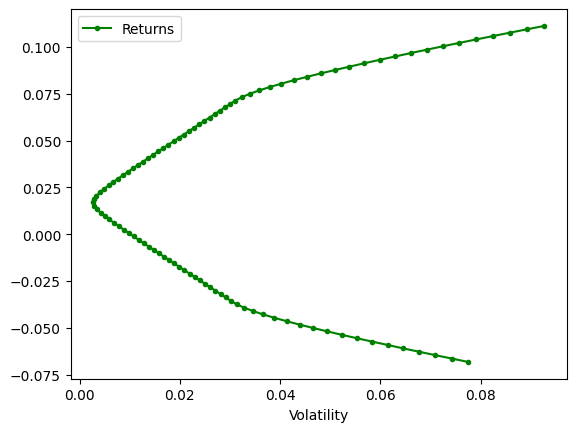

In [ ]:
portfolio = Portfolio(all_securities, rf = get_risk_free_rate('2008-05-06'), equity_benchmark = SPY, future_benchmark = DBC,treasury_benchmark = tenYr)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.max_sharpe_portfolio(n_points=100)
portfolio.plot_ef(n_points = 100)


In [10]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [ 0.06020607  0.06342413 -0.00391175  0.01219299  0.03901196  0.02867168
  0.18630227  0.05457795  0.1049011  -0.5         0.01743215  0.06607656
  0.47271115  0.0167664  -0.0153655   0.00333482 -0.03213181  0.47244846
  0.21601314 -0.10479697 -0.16720005 -0.08904407  0.10770462 -0.00932531]
MSR portfolio expected annualized log return: 0.07129950707867308
MSR portfolio annualized volatility of log returns: 0.031058480953055384
Sharpe Ratio of Portfolio: 1.7339094450997163
MSR portfolio VaR: 0.05108665504323637
MSR portfolio ES: 0.06406472644359278



In [ ]:
# Filters data to only 2020 election cycle
portfolio.filter(startDate="2020-01-01", endDate="2021-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2020-05-05'))
# See how the calculated weights using data up to 2016 election would have worked
# for the 2020 election
print("2020 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2019 (6.5 month period of a non-election year)
portfolio.filter(startDate="2019-05-05", endDate="2019-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2019-05-06'))
print("2019 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2018 (6.5 month period of a non-election year)
portfolio.filter(startDate="2018-05-05", endDate="2018-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2018-05-07'))
print("2018 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))


# Filters data to May 5 to November 17 of 2017 (6.5 month period of a non-election year)
portfolio.filter(startDate="2017-05-05", endDate="2017-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2017-05-05'))
print("2017 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

2020 election period actual annualized log returns: 0.007174945718329523
2019 May 5 to November 17 actual annualized log returns: 0.03159994728513012
2018 May 5 to November 17 actual annualized log returns: 0.007372088857993227
                      XLB            XLF            XLP            XLY  \
           XLB Log Return XLF Log Return XLP Log Return XLY Log Return   
2017-05-05       0.014123      -0.001676       0.002720       0.006230   
2017-05-08      -0.008073      -0.000840      -0.000362       0.001883   
2017-05-09      -0.007569      -0.003785      -0.003630       0.005740   
2017-05-10       0.003224       0.003365       0.000727      -0.003418   
2017-05-11      -0.001516      -0.006319       0.001452      -0.005981   
...                   ...            ...            ...            ...   
2017-11-13       0.005149       0.001533       0.005695       0.003350   
2017-11-14      -0.009115      -0.000383       0.003474       0.000863   
2017-11-15      -0.006065       